In [1]:
import pandas as pd 
import seaborn as sns
import numpy as mp

In [2]:
data=pd.read_csv("/Users/mohao/Downloads/毛子2/ммо/лаб1/Latest Covid-19 India Status.csv")

In [3]:
data.head()

,State/UTs,Total Cases,Active,Discharged(��Ժ��,Deaths,Active Ratio,Discharge Ratio,Death Ratio,Population
0,Andaman And Nicobar,10032,1,9902,129,0.01,98.70,1.29,100896618
1,Andhra Pradesh,2319504,346,2304428,14730,0.01,99.35,0.64,128500364
2,Arunachal Pradesh,64484,0,64188,296,0.00,99.54,0.46,658019
3,Assam,724196,1358,716199,6639,0.19,98.90,0.92,290492
4,Bihar,830459,32,818171,12256,0.00,98.52,1.48,40100376


In [4]:
data.isnull().sum()

State/UTs           0
Total Cases         0
Active              0
Discharged(��Ժ��    0
Deaths              0
Active Ratio        0
Discharge Ratio     0
Death Ratio         0
Population          0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   State/UTs         36 non-null     object 
 1   Total Cases       36 non-null     int64  
 2   Active            36 non-null     int64  
 3   Discharged(��Ժ��  36 non-null     int64  
 4   Deaths            36 non-null     int64  
 5   Active Ratio      36 non-null     float64
 6   Discharge Ratio   36 non-null     float64
 7   Death Ratio       36 non-null     float64
 8   Population        36 non-null     int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 2.7+ KB


In [6]:
#Задача №16.

#Для набора данных проведите нормализацию для одного (произвольного) числового 
#признака с использованием преобразования Бокса-Кокса (Box-Cox transformation).

In [7]:
import scipy.stats
from scipy.stats import boxcox  

/Users/mohao/Downloads/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Death Ratio', ylabel='Density'>

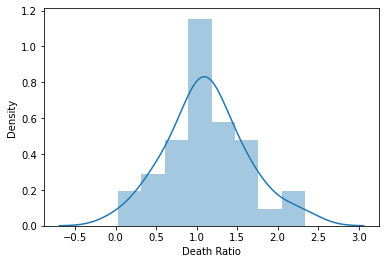

In [8]:
sns.distplot(data['Death Ratio'])

In [9]:
new=scipy.stats.boxcox(x=data['Death Ratio'])

/Users/mohao/Downloads/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

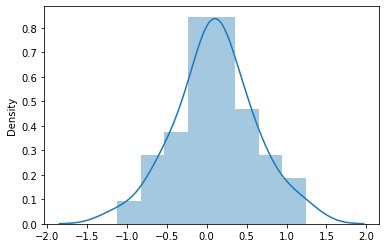

In [10]:
sns.distplot(new[0])

In [11]:
#Для студентов группы ИУ5-24М, ИУ5И-24М - 
#для произвольной колонки данных построить график "Скрипичная диаграмма (violin plot)".

<AxesSubplot:xlabel='Total Cases'>

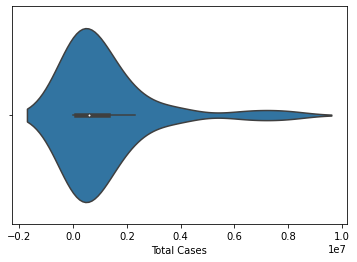

In [12]:
sns.violinplot(x=data["Total Cases"])

<AxesSubplot:xlabel='Deaths'>

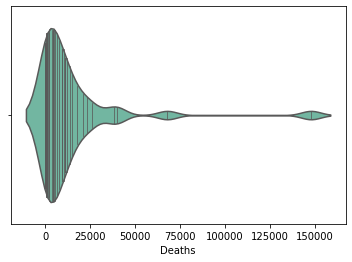

In [13]:
sns.violinplot(x=data["Deaths"], palette="Set2", split=True,
               scale="count", inner="stick",
               scale_hue=False, bw=.2)

In [14]:
#Задача №36.
#Для набора данных проведите процедуру отбора признаков (feature selection). 
#Используйте класс SelectKBest для 5 лучших признаков, и метод, основанный на взаимной информации.

In [15]:
from sklearn.feature_selection import SelectKBest
from matplotlib import pyplot as plt
from sklearn.feature_selection import f_regression

In [16]:
#Выберите данные для обработки

In [17]:
y=data['Total Cases']
x=data.drop(['Total Cases','State/UTs'],axis=1)

In [18]:
bestfeatures = SelectKBest(score_func=f_regression,k=5)

In [19]:
fit = bestfeatures.fit(x,y)

In [20]:
dfscores = pd.DataFrame(fit.scores_)


In [21]:
dfcolumns = pd.DataFrame(x.columns)

In [24]:
featureScores = pd.concat([dfcolumns,dfscores],axis=1)

In [25]:
featureScores.columns = ['Specs','Score'] 
print(featureScores.nlargest(5,'Score'))

              Specs         Score
1  Discharged(��Ժ��  1.367958e+06
2            Deaths  2.674688e+02
0            Active  3.130274e+01
5       Death Ratio  5.268177e-01
4   Discharge Ratio  4.418779e-01
